# Neel Jadhav

## Data Science and Business Analyst internship at Sparks Foundation

## Task2 - To predict the optimum number of clusters and represent it visually for the given Iris Dataset

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

## Read Data

In [5]:
df = pd.read_csv("Iris.csv")

In [6]:
df.head() #print top 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info() #There is one object data type, so it is the categorical variable that the model needs to predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe() #print the statistical information like mean,median,mode .... of all columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
x =df.iloc[:, [0, 1, 2, 3]].values  #All the columns except Target column - Species, which we need to predict

## Find the perfect value for cluster

C:\Users\naman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


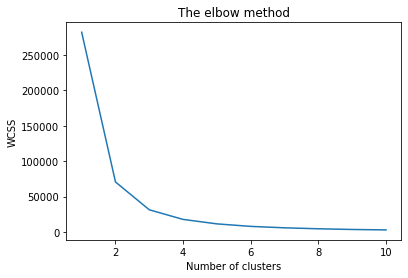

In [11]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #Inertia is the sum of squared error for each cluster
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## You see here value = 3 is optimized as curve will start flattening

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
pred = kmeans.fit_predict(x)
df = pd.DataFrame(x)
df['cluster'] = pred
df['cluster'].value_counts()


0    50
1    50
2    50
Name: cluster, dtype: int64

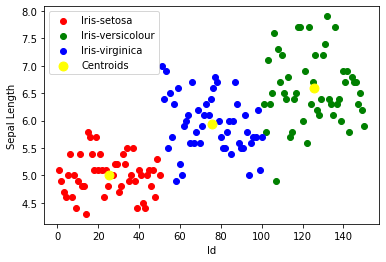

In [19]:
## Using Id and Sepal Length only
plt.scatter(x[pred == 0, 0], x[pred == 0, 1],c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1],c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],c = 'blue', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Sepal Length')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=80, c = 'yellow', label = 'Centroids')

plt.legend()

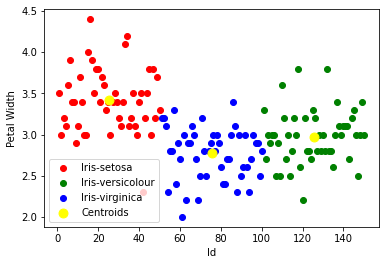

In [20]:
## Using Id and sepal Width only
plt.scatter(x[pred == 0, 0], x[pred == 0,2],c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1,2],c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2,2],c = 'blue', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Petal Width')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],s=80, c = 'yellow', label = 'Centroids')

plt.legend()

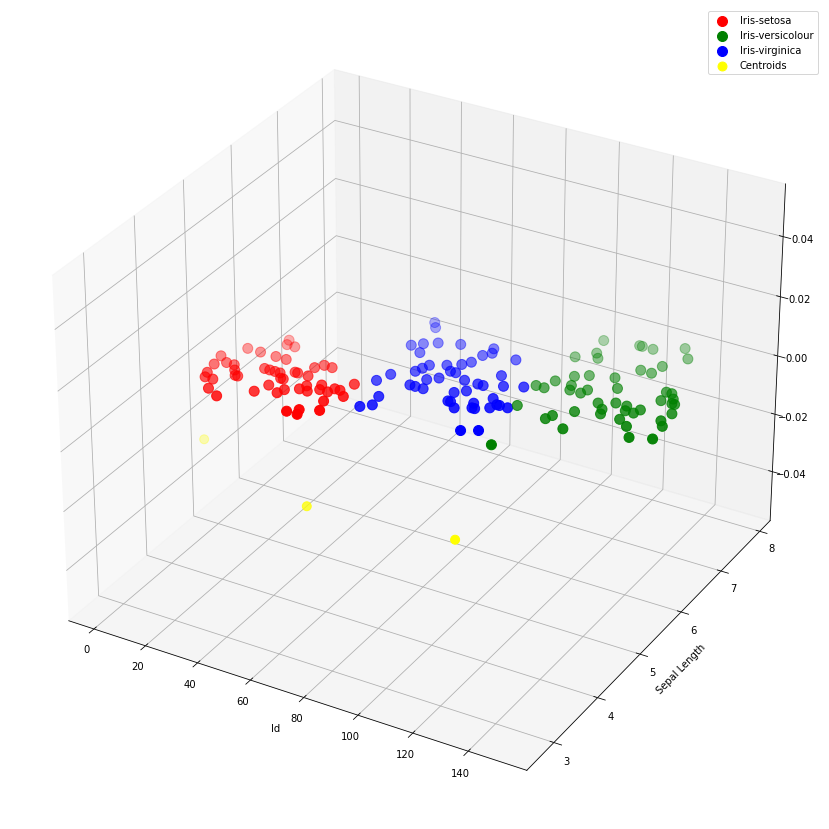

In [21]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection='3d')
plt.scatter(x[pred == 0, 0], x[pred == 0,1],s=100,c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1,1],s=100,c = 'green', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2,1],s=100,c = 'blue', label = 'Iris-virginica')
plt.xlabel('Id')
plt.ylabel('Sepal Length')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2],s=80, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()
